In [161]:
import numpy as np
import matplotlib, re
import matplotlib.pyplot as plt

colors = [ i['color'] for i in plt.rcParams['axes.prop_cycle'] ]
plt.rc('font', size=15)
plt.rc('font', family='serif')
plt.rc('text', usetex=True)


def savefig(fname,**kwargs):
    plt.savefig(fname,**kwargs)
    get_ipython().system('~/.local/share/nautilus/scripts/untrim.sh %s'%fname)
    get_ipython().system('gs -dNOPAUSE -dBATCH -sDEVICE=pdfwrite -dPDFSETTINGS=/prepress -dEmbedAllFonts=true -sOutputFile=%s -f %s'%(fname.replace('pdf','tmp'),fname))
    get_ipython().system('mv %s %s'%(fname.replace('pdf','tmp'),fname))


In [162]:
sf = 7 # small font for K factors

def square(x,y,width=.1):
    return [[x[0]-width,x[0]+width,x[1]+width,x[1]-width,x[0]-width],[y[0],y[0],y[1],y[1],y[0]]]

x = np.array(range(len(ops)))
shift=.15

# plt.figure(figsize=(5,6))
# plt.subplots_adjust(wspace=0., hspace=0.)


# square
# plt.subplot(2,1,1)
# plt.plot(x-shift, nums[:,10],'.k')
# plt.plot(x+shift, nums[:,13], '.k')
ylab = 800
def plot(data,proc,fname, lloc, lscale=[], kscale=[]):
    
    if len(lscale)==0:
        lscale=np.ones(int((len(data)-1)/2))
    if len(kscale)==0:
        kscale=np.ones(int((len(data)-1)/2))
    
    
    i=-1
    smlo  = data[0][1]*(1+data[0][2:4]/100.)
    smnlo = data[0][4]*(1+data[0][5:7]/100.)
    plt.fill(*square(np.array([i,i])-shift,smlo), color='black', alpha=.15)
    plt.fill(*square(np.array([i,i])+shift,smnlo),color='black', alpha=.3)
    plt.plot(i-shift,data[0][1],'.',color='black', alpha=.5)
    plt.plot(i+shift,data[0][4],'.',color='black')
    plt.text(i,max(smnlo)*1.5,'SM', color='black', ha='center', va='bottom')
    plt.text(i+shift,max(smnlo),'NLO',color='black', ha='center', va='bottom', fontsize=sf)
    plt.text(i-shift,min(smlo)*.9,'LO',color='black', ha='center', va='top', fontsize=sf)


    # plt.text(i,ylab,'SM',     color='black', ha='center', va='bottom')
    plt.text(i+shift*1.4, min(smnlo)*.8, '$K$={:.2g}'.format(data[0][7]),color='black', ha='center', va='top', fontsize=sf)

    for i in x:
        if np.abs(data[2+2*i][1]) <= 1e-8:
            continue
        
        # quadratic
        lo  = data[2+2*i][1]*(1+data[2+2*i][2:4]/100.)
        nlo = data[2+2*i][4]*(1+data[2+2*i][5:7]/100.)
        plt.fill(*square(np.array([i,i])-shift, lo),color=colors[i], alpha=.15)
        plt.fill(*square(np.array([i,i])+shift,nlo),color=colors[i], alpha=.5)
        plt.plot(i-shift, np.abs(data[2+2*i][1]),'.', color=colors[i], alpha=.5)
        plt.plot(i+shift, np.abs(data[2+2*i][4]),'.', color=colors[i])
        plt.text(i,max(max(lo),max(nlo))*lscale[i],ops[i],color=colors[i], ha='center', va='bottom')
    #     plt.text(i,ylab,ops[i],color=colors[i], ha='center', va='bottom')
        plt.text(i+shift, min(nlo)*.8*kscale[i], '${:.2g}$'.format(data[2+2*i][7]),color=colors[i], ha='center', va='top', fontsize=sf)
    #     plt.text(i,.8*min(min(lo),min(nlo)),labs[i],color=colors[i], ha='center', va='top', fontsize=15)


        # linear
        lo  = np.abs(data[1+2*i][1])*(1+data[1+2*i][2:4]/100.)
        nlo = np.abs(data[1+2*i][4])*(1+data[1+2*i][5:7]/100.)
        plt.fill(*square(np.array([i,i])-shift, lo),color=colors[i], alpha=.15)
        plt.fill(*square(np.array([i,i])+shift,nlo),color=colors[i], alpha=.5)
        mark = 'x' if data[1+2*i][1] <0 else '+'
        plt.plot(i-shift, np.abs(data[1+2*i][1]),mark, color=colors[i], alpha=.5)
        mark = 'x' if data[1+2*i][4] <0 else '+'
        plt.plot(i+shift, np.abs(data[1+2*i][4]),mark, color=colors[i])
    #     plt.text(i,max(max(lo),max(nlo)),ops[i],color=colors[i], ha='center', va='bottom')
        plt.text(i+shift, min(nlo)*.8, '${:.2g}$'.format(data[1+2*i][7]),color=colors[i], ha='center', va='top', fontsize=sf)



    # plt.errorbar(1-shift/2.,12.6,yerr=(5.8+5.2)/2,fmt='.k')
    # plt.errorbar(1+shift/2.,24.,yerr=(7+6)/2,fmt='.k')
    # plt.text(1-shift/2,2.5,'CMS', rotation=90, fontsize=10, ha='center', va='bottom') # 1908.06463
    # plt.text(1+shift/2,2.5,'ATLAS', rotation=90, fontsize=10, ha='center', va='bottom')  # 2007.14858 SS+multi (MVA)


    plt.yscale('log')
    plt.ylim(0.05,2000)
    # plt.xticks(x,ops)
    plt.xticks([],[])
    plt.gca().yaxis.set_ticks_position('both')
    plt.text(lloc[0],lloc[1],' $\\bullet$ quadratic\n+ linear positive\n$\\times$ linear negative',rotation=0, ha='left', va='top', fontsize=15)
    plt.title(proc)

    savefig(fname)
    plt.show()

def read_table(txt):
    data = []
    ops = []
    for line in txt.split('\n'):
        found = re.findall('[0-9+\-.]{2,}',line)
        if len(found)>0:
            floats = list(map(float,found))
            if len(floats)==7:
                floats = [0.]+floats
            data.append(floats)
        op = re.findall('\$c[^$]+\$',line)
        if len(op)>0:
            ops.append(op[0])
    data = np.array(data)
    return (ops, data)

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-wwa.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


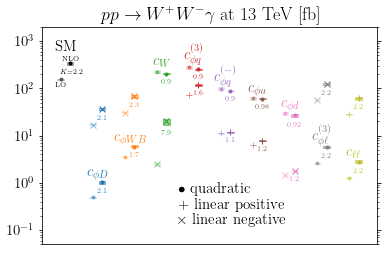

In [163]:

txt = '''    \multicolumn{2}{|c|}{SM}  & $155.3(3)^{+2.8\%}_{-3.6\%}$  & $337(1)^{+7.3\%}_{-5.7\%}$ & 2.17 \\
    \hline 
    \multirow{2}{*}{$c_{\phi D}$}  & $\mathcal{O}(\Lambda^{-2})$   & $-17.15(4)^{+3.7\%}_{-2.9\%}$ & $-36.6(1)^{+5.6\%}_{-7.1\%}$ & 2.14 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.493(1)$^{+2.9\%}_{-3.8\%}$ & 1.018(3)$^{+6.9\%}_{-5.4\%}$ & 2.07 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi WB}$} &  $\mathcal{O}(\Lambda^{-2})$   & $-30.30(7)^{+3.7\%}_{-2.9\%}$ & $-68.5(2)^{+5.9\%}_{-7.5\%}$ & 2.26 \\
    &$\mathcal{O}(\Lambda^{-4})$ & 3.51(3)$^{+0.0\%}_{-0.3\%}$ & 5.87(4)$^{+6.0\%}_{-4.7\%}$ & 1.67 \\
    \hline 
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $-2.54(3)^{+4.6\%}_{-4.7\%}$ & $-20.0(4)^{+13.0\%}_{-16.8\%}$ & 7.86 \\ 
    &$\mathcal{O}(\Lambda^{-4})$  & $223.6(8)^{+8.5\%}_{-7.2\%}$ & $201(3)^{+2.8\%}_{-1.3\%}$ & 0.90 \\ 
    
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$      & 72.6(1)$^{+1.7\%}_{-2.3\%}$ & 118.0(5)$^{+5.0\%}_{-3.8\%}$ & 1.63 \\ 
    & $\mathcal{O}(\Lambda^{-4})$ & 278.4(8)$^{+7.4\%}_{-6.3\%}$ & 251(3)$^{+1.8\%}_{-0.8\%}$ & 0.90  \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(-)}$} & $\mathcal{O}(\Lambda^{-2})$ & 11.17(6)$^{+1.0\%}_{-1.6\%}$ & 11.7(2)$^{+1.0\%}_{-0.9\%}$ & 1.05 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 97.6(5)$^{+7.6\%}_{-6.5\%}$ & 88(1)$^{+1.3\%}_{-1.1\%}$ & 0.90 \\
    \hline
    \multirow{2}{*}{$c_{\phi u}$} & $\mathcal{O}(\Lambda^{-2})$     & 6.35(2)$^{+0.2\%}_{-0.8\%}$ & 7.76(5)$^{+2.8\%}_{-2.6\%}$ & 1.22 \\
    & $\mathcal{O}(\Lambda^{-4})$  & 61.5(3)$^{+7.8\%}_{-6.6\%}$ & 60(1)$^{+2.4\%}_{-0.6\%}$ & 0.98  \\
    \hline 
    \multirow{2}{*}{$c_{\phi d}$} & $\mathcal{O}(\Lambda^{-2})$     & $-1.437(4)^{+0.2\%}_{-0.0\%}$ & $-1.784(7)^{+1.8\%}_{-2.6\%}$ & 1.24 \\
    & $\mathcal{O}(\Lambda^{-4})$ & 29.5(2)$^{+7.8\%}_{-6.7\%}$ & 27.2(3)$^{+6.6\%}_{-8.9\%}$ & 0.92  \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-56.43(9)^{+2.6\%}_{-2.0\%}$ & $-123.7(3)^{+4.1\%}_{-5.2\%}$ & 2.19 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 2.566(4)$^{+2.0\%}_{-2.6\%}$  & 5.62(1)$^{+5.2\%}_{-4.1\%}$ & 2.19 \\
    \hline
    
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & 28.28(6)$^{+2.8\%}_{-3.6\%}$ & 61.3(2)$^{+7.3\%}_{-5.7\%}$ & 2.17 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 1.286(3)$^{+2.8\%}_{-3.6\%}$ & 2.785(9)$^{+7.3\%}_{-5.7\%}$ & 2.17 \\ '''

ops, data = read_table(txt)

proc  = '$pp\\to W^+W^-\\gamma$ at 13 TeV [fb]'
fname = 'triboson-wwa.pdf'
lloc  = 2.5,1
plot(data,proc,fname, lloc)

In [164]:
def empty_rows(d):
    dd = [d[0]]
    for i in range(len(ops)):
        if ops[i] not in o:
            dd.append([1e-8]*8)
            dd.append([1e-8]*8)
        else:
            print(ops[i])
            dd.append(d[1+2*o.index(ops[i])])
            dd.append(d[2+2*o.index(ops[i])])
    return( np.array(dd) )

$c_{\phi D}$
$c_{\phi WB}$
$c_{W}$
$c_{\phi q}^{(3)}$
$c_{\phi \ell}^{(3)}$
$c_{\ell \ell}$
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-waa.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


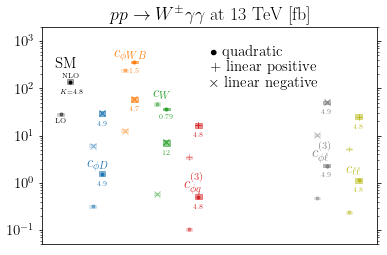

In [165]:
txt = '''    \multicolumn{2}{|c|}{SM} & $28.66(7)^{+6.3\%}_{-7.4\%}$ & $138.6(8)^{+12.5\%}_{-11.2\%}$ & 4.84\\ 
    \hline 
    \multirow{2}{*}{$c_{\phi D}$} & $\mathcal{O}(\Lambda^{-2})$ & $-6.07(1)^{+7.4\%}_{-6.3\%}$ & $-29.5(2)^{+11.4\%}_{-12.8\%}$ & 4.86 \\
    &$\mathcal{O}(\Lambda^{-4})$ & 0.3218(8)$^{+6.3\%}_{-7.4\%}$ & 1.56(1)$^{+12.8\%}_{-11.4\%}$ & 4.86 \\ 
    \hline
    \multirow{2}{*}{$c_{\phi WB}$} & $\mathcal{O}(\Lambda^{-2})$ & $-12.8(2)^{+7.5\%}_{-6.4\%}$ & $-60(1)^{+11.1\%}_{-12.4\%}$ & 4.70 \\
    & $\mathcal{O}(\Lambda^{-4})$ & 243.5(4)$^{+6.8\%}_{-8.0\%}$ & 356.8(9)$^{+4.1\%}_{-5.3\%}$ & 1.47 \\
    \hline
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $-0.591(2)^{+5.6\%}_{-4.6\%}$ & $-7.23(3)^{+12.2\%}_{-15.4\%}$ & 12.24 \\
    &$\mathcal{O}(\Lambda^{-4})$ & $46.8(2)^{+9.8\%}_{-8.1\%}$ & $36.8(9)^{+4.0\%}_{-3.2\%}$ & 0.79  \\ 
    \hline
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$  & 3.48(1)$^{+6.3\%}_{-7.5\%}$  & 16.7(1)$^{+12.8\%}_{-11.4\%}$ & 4.80 \\
    &$\mathcal{O}(\Lambda^{-4})$ & 0.1054(4)$^{+6.3\%}_{-7.5\%}$ & 0.506(4)$^{+12.8\%}_{-11.4\%}$ & 4.80 \\ 
    \hline
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$  & $-10.43(2)^{+5.3\%}_{-4.5\%}$ & $-50.6(2)^{+8.0\%}_{-9.0\%}$ & 4.86 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.474(1)$^{+4.5\%}_{-5.3\%}$ & 2.30(1)$^{+9.0\%}_{-8.0\%}$ & 4.86 \\
    \hline 
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & 5.23(2)$^{+6.3\%}_{-7.5\%}$ & 25.2(2)$^{+12.7\%}_{-11.4\%}$ & 4.82 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.2376(7)$^{+6.3\%}_{-7.5\%}$ & 1.145(7)$^{+12.7\%}_{-11.4\%}$ & 4.82 \\'''
o,d=read_table(txt)
dd = empty_rows(d)
proc  = '$pp\\to W^\pm\\gamma\\gamma$ at 13 TeV [fb]'
fname = 'triboson-waa.pdf'
lloc  = 3.5,800
plot(dd,proc,fname, lloc)

$c_{\phi D}$
$c_{\phi WB}$
$c_{W}$
$c_{\phi q}^{(3)}$
$c_{\phi q}^{(-)}$
$c_{\phi \ell}^{(3)}$
$c_{\ell \ell}$
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-wza.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


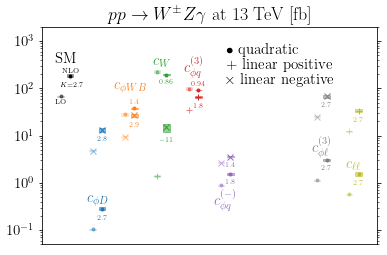

In [166]:
txt = '''\multicolumn{2}{|c|}{SM} & $68.7(2)^{+2.1\%}_{-2.9\%}$ & $186.4(6)^{+8.9\%}_{-7.1\%}$ & 2.71 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi D}$} & $\mathcal{O}(\Lambda^{-2})$ & $-4.74(1)^{+2.8\%}_{-2.0\%}$ & $-13.43(5)^{+7.3\%}_{-9.2\%}$ & 2.84 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.1054(3)$^{+2.2\%}_{-3.0\%}$ & 0.286(1)$^{+8.8\%}_{-7.0\%}$ &  2.71 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi WB}$} & $\mathcal{O}(\Lambda^{-2})$  & $-9.32(3)^{+2.9\%}_{-2.2\%}$ & $-27.1(1)^{+7.4\%}_{-9.3\%}$ & 2.90 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 28.1(1)$^{+4.8\%}_{-5.7\%}$ & 37.8(2)$^{+2.7\%}_{-3.4\%}$ & 1.35 \\ 
    \hline 
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $1.42(1)^{+3.4\%}_{-4.4\%}$ & $-15.2(2)^{+16.4\%}_{-21.1\%}$ & $-10.72$ \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $225.5(7)^{+9.2\%}_{-7.7\%}$ & $194(1)^{+2.4\%}_{-0.8\%}$ & 0.86 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & 35.26(6)$^{+0.6\%}_{-1.1\%}$ & 64.4(3)$^{+6.4\%}_{-5.0\%}$ & 1.83 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 98.6(3)$^{+7.7\%}_{-6.5\%}$ & 92.7(8)$^{+1.4\%}_{-1.2\%}$ & 0.94  \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(-)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-2.69(3)^{+3.1\%}_{-2.3\%}$ & $-3.6(1)^{+2.8\%}_{-3.0\%}$ & 1.35 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.883(2)$^{+2.8\%}_{-3.7\%}$ & 1.551(6)$^{+5.1\%}_{-4.2\%}$ & 1.76\\ 
    \hline 
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-24.94(4)^{+2.0\%}_{-1.5\%}$ & $-67.5(2)^{+5.0\%}_{-6.3\%}$ & 2.71 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 1.134(2)$^{+1.5\%}_{-2.0\%}$ & 3.069(7)$^{+6.3\%}_{-5.0\%}$ & 2.71 \\ 
    \hline 
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & 12.50(3)$^{+2.1\%}_{-2.9\%}$ & 33.8(1)$^{+9.0\%}_{-7.2\%}$ & 2.70 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.569(1)$^{+2.1\%}_{-2.9\%}$ & 1.537(6)$^{+9.0\%}_{-7.2\%}$ & 2.70 \\'''
o,d = read_table(txt)
ddd = empty_rows(d)
proc  = '$pp\\to W^\pm Z\\gamma$ at 13 TeV [fb]'
fname = 'triboson-wza.pdf'
lloc  = 4,900
kscale = np.ones(int((len(data)-1)/2))
lscale = np.ones(int((len(data)-1)/2))
lscale[1] = 2
kscale[1] = 2
lscale[3] = 1.5
kscale[3] = 2
lscale[4] = .15
plot(ddd,proc,fname, lloc, lscale=lscale, kscale=kscale)